In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
anime = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\MRS\Anime_Recommendation\Datasets\anime.csv')
rating = pd.read_csv(r'C:\Users\Hp\OneDrive\Desktop\MRS\Anime_Recommendation\Datasets\rating.csv')

In [3]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
anime = anime.rename(columns ={"rating": 'avg_rating'})

In [5]:
anime.shape

(12294, 7)

In [6]:
rating.shape

(7813737, 3)

In [7]:
rating

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1
...,...,...,...
7813732,73515,16512,7
7813733,73515,17187,9
7813734,73515,22145,10
7813735,73516,790,9


In [8]:
anime_rating = anime.merge(rating, on='anime_id')

In [9]:
anime_rating.shape

(7813727, 9)

In [10]:
anime_rating.head()

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


**Exploratory Data Analysis (EDA) :** 

In [11]:
anime_rating['type'].value_counts()

type
TV         5283596
Movie      1051998
OVA         800307
Special     559366
ONA          91956
Music        26500
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='type'>

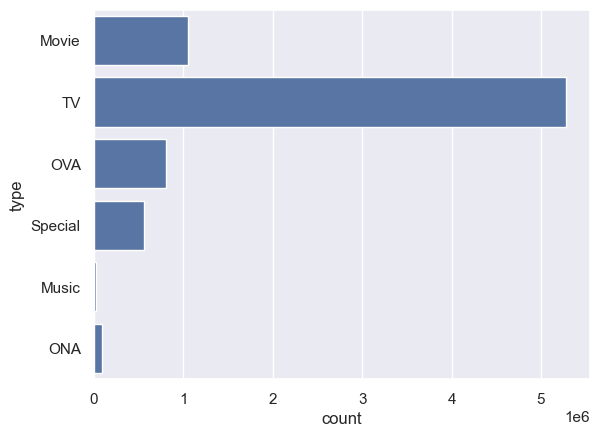

In [12]:
sns.set_theme(style="darkgrid")
sns.countplot(data = anime_rating, y='type')

The highest no of reviews are recieved from anime broadcasted on TV.

In [13]:
Top_20_Anime = anime_rating.groupby('name').count()['user_id'].sort_values(ascending=False).head(20).reset_index()
Top_20_Anime

,name,user_id
0,Death Note,39340
1,Sword Art Online,30583
2,Shingeki no Kyojin,29584
3,Code Geass: Hangyaku no Lelouch,27718
4,Elfen Lied,27506
5,Angel Beats!,27183
6,Naruto,25925
7,Fullmetal Alchemist,25032
8,Fullmetal Alchemist: Brotherhood,24574
9,Toradora!,24283


<Axes: xlabel='user_id', ylabel='name'>

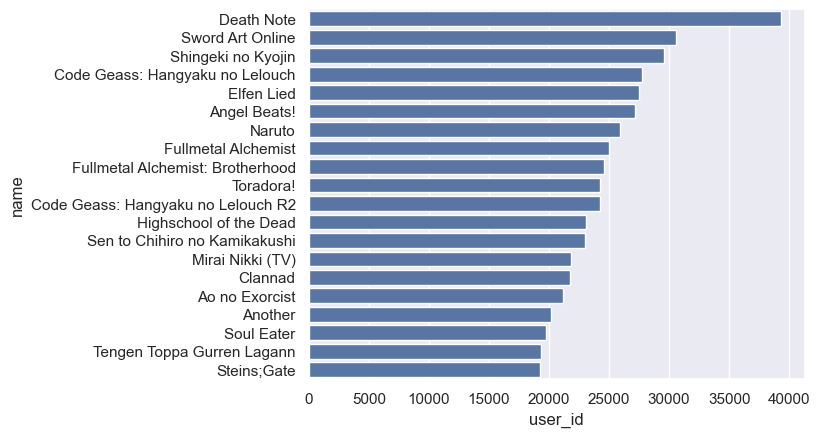

In [14]:
sns.barplot(y='name', x="user_id", data=Top_20_Anime)

Anime ‘Death Note’ seems to have received the highest no of reviews approx.(40,000) users. Hence it is by far the most rated Anime by the Anime community.

In [15]:
rating_data_with_Anime_name = rating.merge(anime[['name', 'anime_id']], on='anime_id', how='left')
rating_data_with_Anime_name.head(10)

,user_id,anime_id,rating,name
0,1,20,-1,Naruto
1,1,24,-1,School Rumble
2,1,79,-1,Shuffle!
3,1,226,-1,Elfen Lied
4,1,241,-1,Girls Bravo: First Season
5,1,355,-1,Shakugan no Shana
6,1,356,-1,Fate/stay night
7,1,442,-1,Naruto Movie 1: Dai Katsugeki!! Yuki Hime Shin...
8,1,487,-1,Girls Bravo: Second Season
9,1,846,-1,School Rumble Ni Gakki


In [16]:
ratings = rating_data_with_Anime_name.groupby('name').mean()['rating'].reset_index()
ratings.rename(columns={'rating':'avg_rating'},inplace=True)
ratings

,name,avg_rating
0,&quot;0&quot;,2.769231
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,0.000000
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,5.774936
3,&quot;Bungaku Shoujo&quot; Memoire,6.155748
4,&quot;Bungaku Shoujo&quot; Movie,6.457980
...,...,...
11191,xxxHOLiC Kei,6.720774
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,6.313742
11193,xxxHOLiC Rou,6.403173
11194,xxxHOLiC Shunmuki,6.238602


In [17]:
rating_count = rating_data_with_Anime_name.groupby('name').count()['user_id'].reset_index()
rating_count.rename(columns={'user_id':'num_of_ratings'}, inplace=True)
rating_count

,name,num_of_ratings
0,&quot;0&quot;,26
1,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,2
2,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,782
3,&quot;Bungaku Shoujo&quot; Memoire,809
4,&quot;Bungaku Shoujo&quot; Movie,1535
...,...,...
11191,xxxHOLiC Kei,3413
11192,xxxHOLiC Movie: Manatsu no Yoru no Yume,2365
11193,xxxHOLiC Rou,1513
11194,xxxHOLiC Shunmuki,1974


In [18]:
rate = ratings.merge(rating_count, on='name')

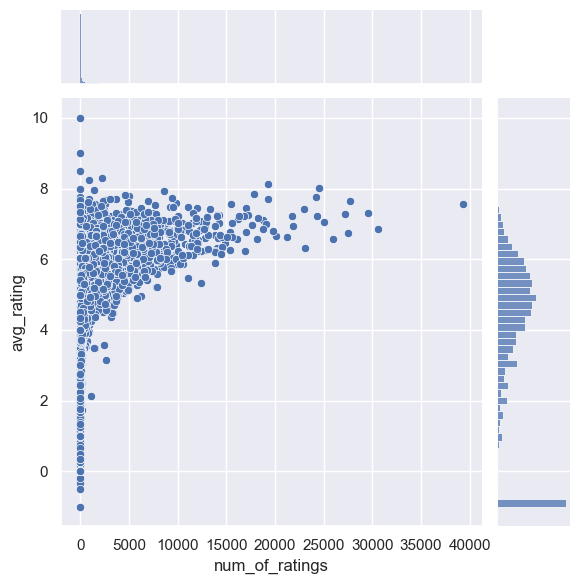

In [19]:
sns.jointplot(x='num_of_ratings', y='avg_rating', data=rate)

Most of the Anime seems to have been rated between 4 to 8. Also a large amount

In [20]:
fig = px.pie(anime, values=anime.type.value_counts().values, names=anime.type.value_counts().index, title='Medium of streaming',width=400, height=400)
fig.update_layout(
    paper_bgcolor="LightSteelBlue",
)

fig.show()

TV’s seems to be the primary source or the medium of choice among the Anime lovers

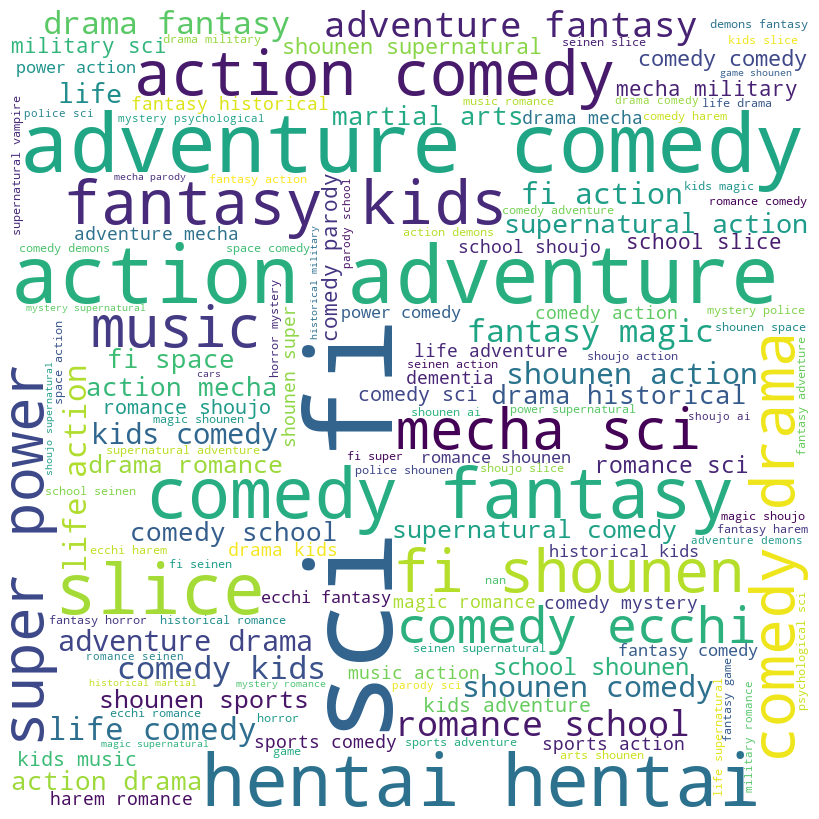

In [21]:
from wordcloud import WordCloud, STOPWORDS

comment_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in anime.genre:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Some of the popular genre I can figure our is action, comedy, fantasy, sci-fi, adventure

**Data Cleaning And I dentifying Relavent Data :**

In [22]:
anime_rating.rating.replace(to_replace=-1, value=0,inplace=True)

In [23]:
anime_rating

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,0
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,0
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,0
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,0


In [24]:
anime_rating.isnull().sum()

anime_id        0
name            0
genre         110
type            4
episodes        0
avg_rating      6
members         0
user_id         0
rating          0
dtype: int64

In [25]:
anime_rating.dropna(inplace=True)

In [26]:
Valid_Users = anime_rating.user_id.value_counts().reset_index()
Valid_Users = Valid_Users.rename(columns={'count':"user_count"})
Valid_Users

,user_id,user_count
0,48766,10225
1,42635,3747
2,53698,2905
3,57620,2702
4,59643,2633
...,...,...
73510,57180,1
73511,42128,1
73512,56249,1
73513,23657,1


In [27]:
Valid_Users.user_count = Valid_Users.user_count.astype(int)
Valid_Users = Valid_Users[Valid_Users.user_count>=200]
Valid_Users

,user_id,user_count
0,48766,10225
1,42635,3747
2,53698,2905
3,57620,2702
4,59643,2633
...,...,...
11273,25284,200
11274,22355,200
11275,59899,200
11276,62533,200


In [28]:
anime_rating_users = anime_rating[anime_rating['user_id'].isin(Valid_Users['user_id'])]

In [29]:
anime_rating_users

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,684,0
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,0
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,0
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,0


In [30]:
Valid_anime = anime_rating_users.name.value_counts().reset_index()
Valid_anime

,name,count
0,Death Note,8714
1,Angel Beats!,8471
2,Sword Art Online,8441
3,Code Geass: Hangyaku no Lelouch,8391
4,Toradora!,8349
...,...,...
11148,Wagahai wa Neko de Aru,1
11149,Wagahai wa Inu de Aru: Don Matsugorou no Seikatsu,1
11150,Visitor,1
11151,Virtual Star 2000,1


In [31]:
Valid_anime = Valid_anime[Valid_anime['count']>=1000]
Valid_anime

,name,count
0,Death Note,8714
1,Angel Beats!,8471
2,Sword Art Online,8441
3,Code Geass: Hangyaku no Lelouch,8391
4,Toradora!,8349
...,...,...
1235,Macademi Wasshoi!,1008
1236,Diamond no Ace,1007
1237,Hakuouki Hekketsuroku,1007
1238,Sekirei: Pure Engagement - Kanwa ni Dai,1006


In [32]:
final_df = anime_rating_users[anime_rating_users['name'].isin(Valid_anime['name'])]

In [33]:
final_df

,anime_id,name,genre,type,episodes,avg_rating,members,user_id,rating
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8
11,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,598,10
13,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,684,0
...,...,...,...,...,...,...,...,...,...
7770899,8577,Aki-Sora: Yume no Naka,"Ecchi, Romance, Seinen, Yuri",OVA,2,6.41,37519,73179,4
7770900,8577,Aki-Sora: Yume no Naka,"Ecchi, Romance, Seinen, Yuri",OVA,2,6.41,37519,73188,0
7770901,8577,Aki-Sora: Yume no Naka,"Ecchi, Romance, Seinen, Yuri",OVA,2,6.41,37519,73276,6
7770903,8577,Aki-Sora: Yume no Naka,"Ecchi, Romance, Seinen, Yuri",OVA,2,6.41,37519,73340,5


In [34]:
pt = final_df.pivot_table(index='name', columns='user_id', values='rating')

pt

user_id,5,7,17,38,43,46,54,123,129,139,...,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN
.hack//Roots,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Sign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
.hack//Tasogare no Udewa Densetsu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-Ghost,NaN,NaN,NaN,NaN,NaN,8.0,NaN,7.0,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC,2.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,NaN,NaN,7.0,NaN,NaN,10.0,8.0,10.0
xxxHOLiC Kei,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN,...,NaN,9.0,NaN,NaN,8.0,NaN,NaN,10.0,8.0,9.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,NaN,NaN,8.0,NaN,NaN,10.0,NaN,9.0


In [35]:
pt.fillna(0, inplace=True)

In [36]:
pt

user_id,5,7,17,38,43,46,54,123,129,139,...,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
name,,,,,,,,,,,,,,,,,,,,,
&quot;Bungaku Shoujo&quot; Movie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
.hack//Roots,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Sign,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
.hack//Tasogare no Udewa Densetsu,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
07-Ghost,0.0,0.0,0.0,0.0,0.0,8.0,0.0,7.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xxxHOLiC,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,7.0,0.0,0.0,10.0,8.0,10.0
xxxHOLiC Kei,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,0.0,0.0,8.0,0.0,0.0,10.0,8.0,9.0
xxxHOLiC Movie: Manatsu no Yoru no Yume,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,8.0,0.0,0.0,8.0,0.0,0.0,10.0,0.0,9.0


In [37]:
similarity_matrix = cosine_similarity(pt)

In [38]:
similarity_matrix.shape

(1240, 1240)

In [39]:
def recommend(anime_name):
    # Strip any leading/trailing whitespace from the book name
    anime_name = anime_name.strip()
    
    # Check if the book is in the pivot table index
    if anime_name not in pt.index:
        print(f"The book '{anime_name}' is not in the dataset.")
        return
    
    # Get the index of the specified book in the pivot table
    index = np.where(pt.index == anime_name)[0][0]
    
    # Get the similarity scores for the book
    similarity_scores_for_anime = similarity_matrix[index]
    
    # Enumerate over the similarity scores and sort them in descending order
    similar_items = sorted(list(enumerate(similarity_scores_for_anime)), key=lambda x: x[1], reverse=True)[1:11]
    
    # Print the recommended book titles
    for item in similar_items:
        similar_anime_index = item[0]
        print(pt.index[similar_anime_index])

In [40]:
recommend('07-Ghost')

Kuroshitsuji
D.Gray-man
Vampire Knight
Pandora Hearts
Vampire Knight Guilty
Nabari no Ou
Ao no Exorcist
Kuroshitsuji II
Code Geass: Hangyaku no Lelouch
Code Geass: Hangyaku no Lelouch R2


In [47]:
anime_df = final_df[['anime_id','genre', 'avg_rating', 'name']]
anime_df = anime_df.drop_duplicates()

In [50]:
anime_df = anime_df.reset_index(drop=True)

In [51]:
anime_df

,anime_id,genre,avg_rating,name
0,32281,"Drama, Romance, School, Supernatural",9.37,Kimi no Na wa.
1,5114,"Action, Adventure, Drama, Fantasy, Magic, Mili...",9.26,Fullmetal Alchemist: Brotherhood
2,9253,"Sci-Fi, Thriller",9.17,Steins;Gate
3,9969,"Action, Comedy, Historical, Parody, Samurai, S...",9.16,Gintama&#039;
4,11061,"Action, Adventure, Shounen, Super Power",9.13,Hunter x Hunter (2011)
...,...,...,...,...
1235,32438,"Drama, Horror, Mystery, Psychological",5.80,Mayoiga
1236,31904,"Action, Shounen, Super Power",5.70,Big Order (TV)
1237,23079,"Romance, Slice of Life, Supernatural",5.54,Glasslip
1238,19315,"Fantasy, Horror, Psychological",3.82,Pupa


In [54]:
#pickle.dump(anime_df, open('anime_df.pkl', 'wb'))
#pickle.dump(similarity_matrix, open('similarity_matrix.pkl', 'wb'))
#pickle.dump(pt, open('pt.pkl', 'wb'))